In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [87]:
df = pd.read_csv("D:\FlySight-Airline_Review_Analyzer\EDA\CLEANED.csv")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\ragep\AppData\Local\Temp\ipykernel_4016\3623919721.py:1: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\FlySight-Airline_Review_Analyzer\EDA\CLEANED.csv")


In [88]:
df = df.reset_index(drop=True)

<h3>What is the avearge overall rating given to the airline?

In [90]:
df.stars.mean()

4.51915380217267

<h4>Plotting the total count for each rating

Text(0.5, 0.98, 'Counts for each ratings')

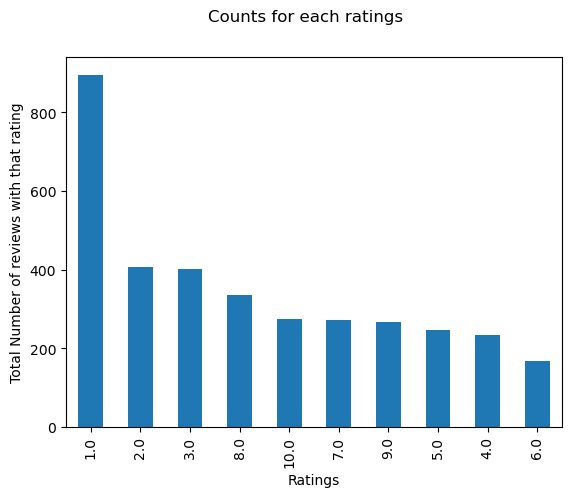

In [92]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [93]:
# Get value counts and reset index
df_ratings = df.stars.value_counts().reset_index()
df_ratings.columns = ['rating', 'count']

# Calculate percentages
pct_values = (df_ratings['count'] / df_ratings['count'].sum() * 100).round(2)
df_ratings['pct_values'] = pct_values

print(df_ratings)


   rating  count  pct_values
0     1.0    896       25.61
1     2.0    406       11.61
2     3.0    401       11.46
3     8.0    335        9.58
4    10.0    275        7.86
5     7.0    272        7.78
6     9.0    266        7.60
7     5.0    245        7.00
8     4.0    234        6.69
9     6.0    168        4.80


In [94]:
df_ratings = df_ratings.reset_index(drop = True)

In [95]:
df_ratings.rename(columns={'rating':'Stars', 'count':'total_counts'}, inplace=True)

In [96]:
df_ratings.head()

,Stars,total_counts,pct_values
0,1.0,896,25.61
1,2.0,406,11.61
2,3.0,401,11.46
3,8.0,335,9.58
4,10.0,275,7.86


C:\Users\ragep\AppData\Local\Temp\ipykernel_4016\1467927732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
C:\Users\ragep\AppData\Local\Temp\ipykernel_4016\1467927732.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

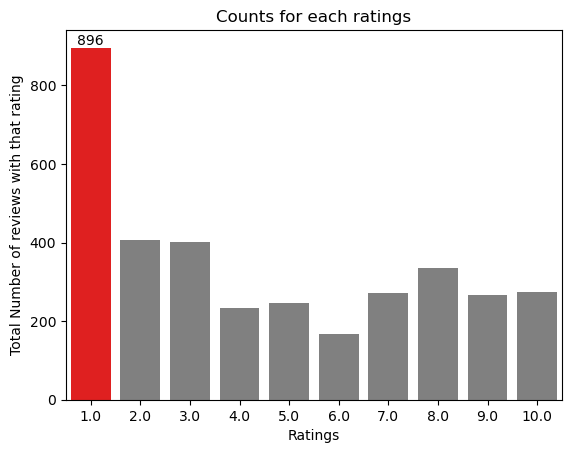

In [97]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [98]:
#All the unique countries reviews have been received from
print(f"{len(df.country.unique())} unique countries")

71 unique countries


<h3>Country providing the highest reviews

In [100]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

Text(0.5, 1.0, 'Maximum number of review by country')

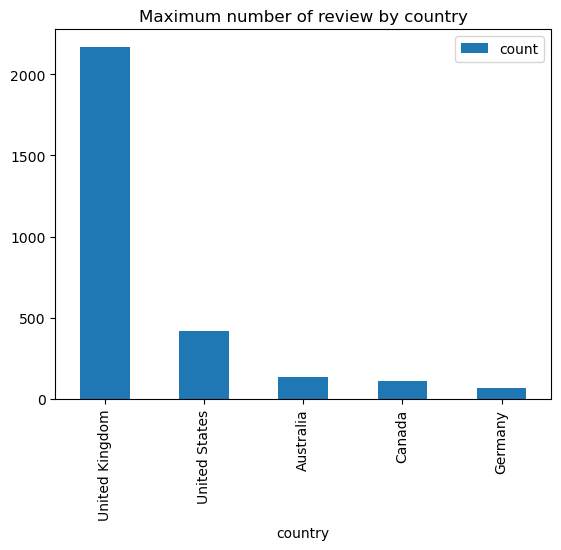

In [101]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

<h3>Country providing average highest ratings

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

C:\Users\ragep\AppData\Local\Temp\ipykernel_4016\3789252484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='avg_rating', data=top12_avg, palette = "pastel", ax=ax)


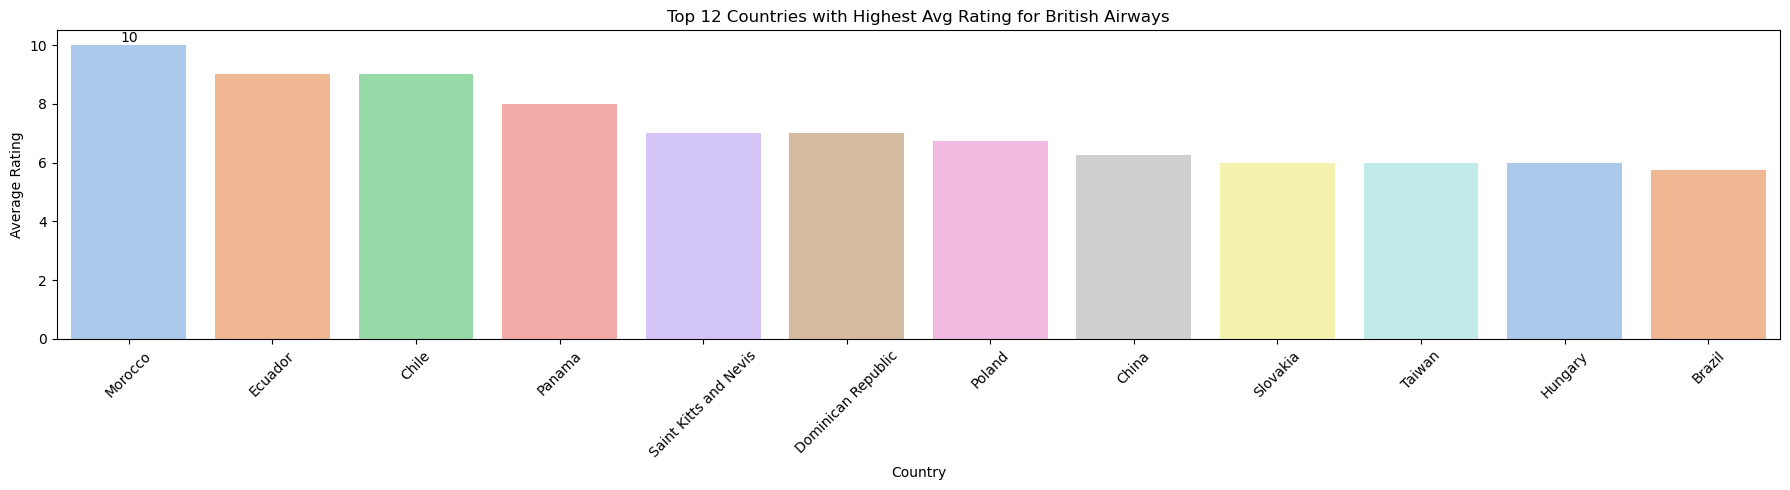

In [121]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Group, calculate mean, and get top 12 countries
top12_avg = (
    df.groupby('country')['stars']
    .mean()
    .sort_values(ascending=False)
    .head(12)
    .reset_index()
)
top12_avg.columns = ['country', 'avg_rating']

# Plotting
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='country', y='avg_rating', data=top12_avg, palette = "pastel", ax=ax)


# Add labels and title
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with Highest Avg Rating for British Airways")
ax.set_xlabel("Country")
ax.set_ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
# Calculate the mean of the 'stars' column (overall ratings)
mean_rating = df['stars'].mean()

# Calculate the standard deviation of the 'stars' column
std_rating = df['stars'].std()

# Print the results
print(f"Mean Rating: {mean_rating}")
print(f"Standard Deviation: {std_rating}")

Mean Rating: 4.51915380217267
Standard Deviation: 3.137366771492677


In [128]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(df['stars'], mean_rating)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 0.0
P-Value: 1.0


In [130]:
# Set the significance level (alpha)
alpha = 0.05

In [133]:
if p_value <= alpha:
    print("Reject the null hypothesis. There is enough evidence to conclude that the average rating has increased significantly.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average rating has increased significantly.")

Fail to reject the null hypothesis. There is not enough evidence to conclude that the average rating has increased significantly.
